In [175]:
#Nuriye Merve Tatlıdil - 150212002

# HEART DISEASE DATA SET PROJECT

In [176]:
import pandas as pd 
df = pd.read_csv("../data/heart.csv")
df
#Firstly I imported the pandas library and then I read the comma separated excel file

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [177]:
df.head() #I looked at the first 5 lines

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [178]:
df.shape #our dataset has 1025 rows 14 columns

(1025, 14)

In [179]:
df.describe().T #I showed some important values of the dataset

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [180]:
df.info() #I showed info data type, column and row number, memory usage information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 1-)DATA CLEANING

# 1-Is there any missing value?

In [181]:
df.isnull().values.any() #my data set does not contain missing value

False

# 2-Is there any outlier data ?

In [182]:
# 1-age attribute

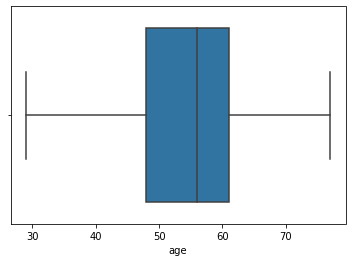

In [183]:
import seaborn as sns 
df_age = df["age"]
sns.boxplot(x = df_age) ; #Firstly I imported the seaborn library then I assigned df age to df_age and I showed 
#df_age with boxplot

In [184]:
# 2-cp attribute

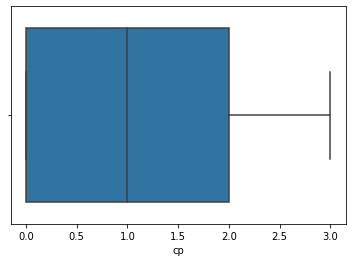

In [185]:
df_cp = df["cp"]
sns.boxplot(x = df_cp) ; #I assigned df age to df_cp and I showed #df_cp with boxplot

In [186]:
# 3-trestbps attribute

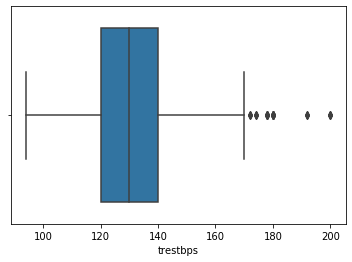

In [187]:
df_trestbps = df["trestbps"]
sns.boxplot(x = df_trestbps) ; #I assigned df age to df_trestbps and I showed #df_trestbps with boxplot 

In [188]:
Q1 = df_trestbps.quantile(0.25) #first interquartile range
Q3 = df_trestbps.quantile(0.75) #third interquartile range
IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
print(Q1)
print(Q3)
print(IQR)
low_limit = Q1 - 1.5*IQR #low limit formula
high_limit = Q3 + 1.5*IQR #high limit formula
print(low_limit)
print(high_limit)

120.0
140.0
20.0
90.0
170.0


In [189]:
outliers_trestbps_higher = (df_trestbps > high_limit) #outlier data greater than the upper limit

In [190]:
df_trestbps[outliers_trestbps_higher] #outlier data

29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64

In [ ]:
df_trestbps[outliers_trestbps_higher] = high_limit  #I assigned limit value to outlier data

In [ ]:
df_trestbps[outliers_trestbps_higher]   #last version of outlier data

In [192]:
# 4-chol attribute

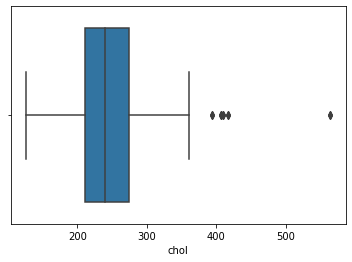

In [193]:
df_chol = df["chol"]
sns.boxplot(x = df_chol) ; #I assigned df age to df_chol and I showed #df_cp with boxplot

In [194]:
Q1 = df_chol.quantile(0.25) #first interquartile range
Q3 = df_chol.quantile(0.75) #third interquartile range
IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
print(Q1)
print(Q3)
print(IQR)
low_limit = Q1 - 1.5*IQR #low limit formula
high_limit = Q3 + 1.5*IQR #high limit formula
print(low_limit)
print(high_limit)

211.0
275.0
64.0
115.0
371.0


In [195]:
outliers_chol_higher = (df_chol > high_limit) #outlier data greater than the upper limit

In [196]:
df_chol[outliers_chol_higher] #outlier data

123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64

In [197]:
df_chol[outliers_chol_higher] = high_limit  #I assigned limit value to outlier data

C:\Users\ntatl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
df_chol[outliers_chol_higher]   #last version of outlier data

123    371
158    371
179    371
192    371
255    371
450    371
464    371
481    371
542    371
578    371
641    371
665    371
685    371
889    371
958    371
996    371
Name: chol, dtype: int64

In [199]:
# 5-restecg attribute

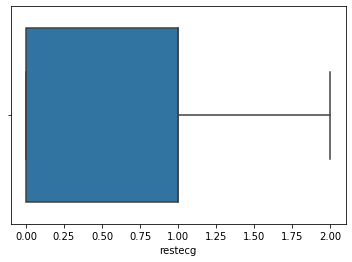

In [200]:
df_restecg = df["restecg"]
sns.boxplot(x = df_restecg) ; #I assigned df age to df_restecg and I showed #df_cp with boxplot

In [201]:
# 6-thalach attribute

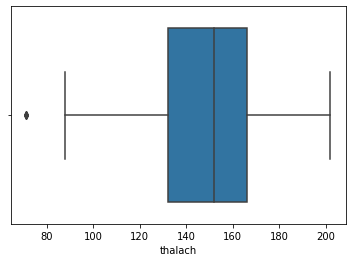

In [202]:
df_thalach  = df["thalach"]
sns.boxplot(x = df_thalach ) ; #I assigned df age to df_thalach  and I showed #df_cp with boxplot

In [203]:
Q1 = df_thalach.quantile(0.25) #first interquartile range
Q3 = df_thalach.quantile(0.75) #third interquartile range
IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
print(Q1)
print(Q3)
print(IQR)
low_limit = Q1 - 1.5*IQR #low limit formula
high_limit = Q3 + 1.5*IQR #high limit formula
print(low_limit)
print(high_limit)

132.0
166.0
34.0
81.0
217.0


In [204]:
outliers_thalach_lower = (df_thalach < low_limit) #outlier data lower than the lower limit

In [205]:
df_thalach[outliers_thalach_lower] #outlier data

267    71
296    71
378    71
559    71
Name: thalach, dtype: int64

In [206]:
df_thalach[outliers_thalach_lower] = low_limit  #I assigned limit value to outlier data

C:\Users\ntatl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
df_thalach[outliers_thalach_lower]  #last version of outlier data

267    81
296    81
378    81
559    81
Name: thalach, dtype: int64

In [208]:
# 7-oldpeak attribute

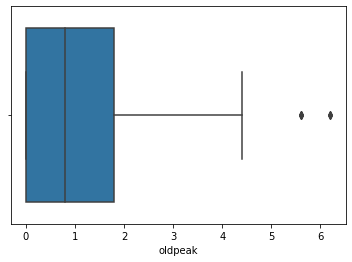

In [209]:
df_oldpeak = df["oldpeak"]
sns.boxplot(x = df_oldpeak) ; #I assigned df age to df_oldpeak and I showed #df_cp with boxplot

In [210]:
Q1 = df_oldpeak.quantile(0.25) #first interquartile range
Q3 = df_oldpeak.quantile(0.75) #third interquartile range
IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
print(Q1)
print(Q3)
print(IQR)
low_limit = Q1 - 1.5*IQR #low limit formula
high_limit = Q3 + 1.5*IQR #high limit formula
print(low_limit)
print(high_limit)

0.0
1.8
1.8
-2.7
4.5


In [211]:
outliers_oldpeak_higher = (df_oldpeak > high_limit)  #outlier data greater than the upper limit

In [212]:
df_oldpeak[outliers_oldpeak_higher] #outlier data 

54     5.6
55     5.6
69     6.2
393    6.2
526    6.2
613    5.6
833    5.6
Name: oldpeak, dtype: float64

In [213]:
df_oldpeak[outliers_oldpeak_higher] = high_limit  #I assigned limit value to outlier data

C:\Users\ntatl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
df_oldpeak[outliers_oldpeak_higher]  #last version of outlier data

54     4.5
55     4.5
69     4.5
393    4.5
526    4.5
613    4.5
833    4.5
Name: oldpeak, dtype: float64

In [215]:
# 8-slope attribute

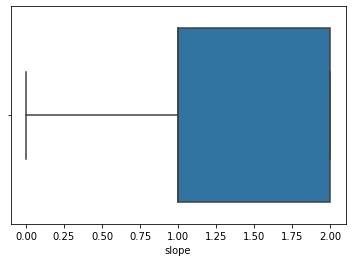

In [216]:
df_slope = df["slope"]
sns.boxplot(x = df_slope) ; #I assigned df age to df_slope and I showed #df_cp with boxplot

In [217]:
# 9-ca attribute

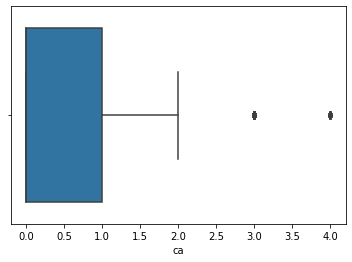

In [218]:
df_ca = df["ca"]
sns.boxplot(x = df_ca) ; #I assigned df age to df_ca and I showed #df_cp with boxplot

In [219]:
Q1 = df_ca.quantile(0.25) #first interquartile range
Q3 = df_ca.quantile(0.75) #third interquartile range
IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
print(Q1)
print(Q3)
print(IQR)
low_limit = Q1 - 1.5*IQR #low limit formula
high_limit = Q3 + 1.5*IQR #high limit formula
print(low_limit)
print(high_limit)

0.0
1.0
1.0
-1.5
2.5


In [220]:
outliers_ca_higher = (df_ca > high_limit) #outlier data greater than the upper limit

In [221]:
df_ca[outliers_ca_higher] #outlier data

4       3
6       3
13      3
52      4
53      3
       ..
985     3
993     4
1003    3
1013    3
1015    3
Name: ca, Length: 87, dtype: int64

In [222]:
df_ca[outliers_ca_higher] = high_limit #I assigned limit value to outlier data

C:\Users\ntatl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
df_ca[outliers_ca_higher]  #last version of outlier data

4       2.5
6       2.5
13      2.5
52      2.5
53      2.5
       ... 
985     2.5
993     2.5
1003    2.5
1013    2.5
1015    2.5
Name: ca, Length: 87, dtype: float64

In [224]:
# 10-thal attribute

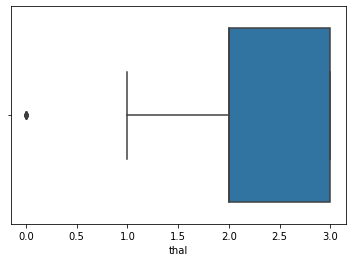

In [225]:
df_thal = df["thal"]
sns.boxplot(x = df_thal) ; #I assigned df age to df_thal and I showed #df_cp with boxplot

In [226]:
Q1 = df_thal.quantile(0.25) #first interquartile range
Q3 = df_thal.quantile(0.75) #third interquartile range
IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
print(Q1)
print(Q3)
print(IQR)
low_limit = Q1 - 1.5*IQR #low limit formula
high_limit = Q3 + 1.5*IQR #high limit formula
print(low_limit)
print(high_limit)

2.0
3.0
1.0
0.5
4.5


In [227]:
outliers_thal_lower = (df_thal < low_limit) #o#utlier data lower than the lower limit

In [228]:
df_thal[outliers_thal_lower]  #outlier data 

14     0
319    0
329    0
359    0
686    0
734    0
893    0
Name: thal, dtype: int64

In [229]:
df_thal[outliers_thal_lower] = low_limit #I assigned limit value to outlier data

C:\Users\ntatl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
df_thal[outliers_thal_lower] #last version of outlier data

14     0.5
319    0.5
329    0.5
359    0.5
686    0.5
734    0.5
893    0.5
Name: thal, dtype: float64

In [231]:
df.tail(30) # last 30 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
995,44,1,1,120,263,0,1,173,0,0.0,2,0.0,3.0,1
996,56,0,0,134,371,0,0,150,1,1.9,1,2.0,3.0,0
997,54,1,0,120,188,0,1,113,0,1.4,1,1.0,3.0,0
998,42,1,0,136,315,0,1,125,1,1.8,1,0.0,1.0,0
999,67,1,0,125,254,1,1,163,0,0.2,1,2.0,3.0,0
1000,64,1,0,145,212,0,0,132,0,2.0,1,2.0,1.0,0
1001,42,1,0,140,226,0,1,178,0,0.0,2,0.0,2.0,1
1002,66,1,0,112,212,0,0,132,1,0.1,2,1.0,2.0,0
1003,52,1,0,108,233,1,1,147,0,0.1,2,2.5,3.0,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1.0,2.0,1


# Data Visualization

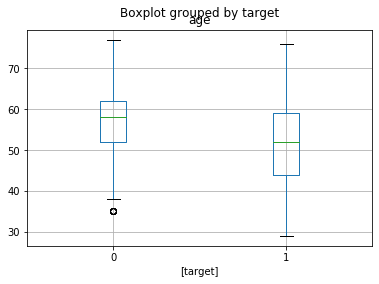

In [232]:
df.boxplot(column=["age"], by=["target"]) #showing age and target attribute with boxplot

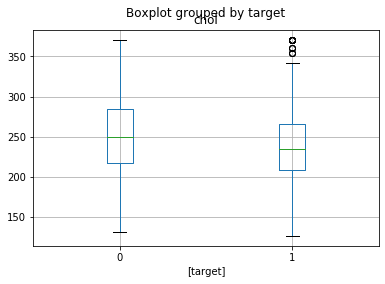

In [233]:
df.boxplot(column=["chol"], by=["target"]) #showing chol and target attribute with boxplot

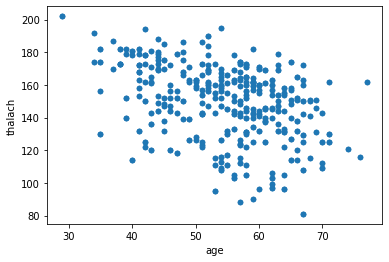

In [234]:
df.plot.scatter(x='age', y='thalach') ##showing age and thalach attribute with scatter plot

# Algorithms

In [235]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#I imported the necessary libraries

# 1-) NAIVE BAYES

In [236]:
df2 = df.copy()
y = df2["target"]
X = df2.drop(["target"], axis=1)
#target attribute shows me whether there is a disease. so i left it out of the model. i will make a prediction with 
#other attributes. i will decide with target attribute
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
#I have separated the data set as 70% train and 30% test. 

In [237]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model
# I built the naive bayes model here.

GaussianNB(priors=None, var_smoothing=1e-09)

In [238]:
nb_model.predict(X_test)[0:10]
#I'm performing the prediction process

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [239]:
nb_model.predict_proba(X_test)[0:10]
#I found the probability values.left row are probabilities of 0. right row are probabilities of 1.

array([[2.02289881e-03, 9.97977101e-01],
       [4.72948002e-02, 9.52705200e-01],
       [9.97998953e-01, 2.00104728e-03],
       [1.07418053e-03, 9.98925819e-01],
       [9.95709032e-01, 4.29096829e-03],
       [5.30855656e-01, 4.69144344e-01],
       [9.99954567e-01, 4.54333214e-05],
       [9.99991933e-01, 8.06680475e-06],
       [4.56333709e-02, 9.54366629e-01],
       [9.99910822e-01, 8.91783973e-05]])

In [240]:
#If I want to calculate the test error:
y_pred = nb_model.predict(X_test)

In [241]:
accuracy_score(y_test, y_pred)
#I calculated the accuracy score

0.827922077922078

In [242]:
#If I calculate cross validation:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.8147942157953281

# 2-) KNN 

In [243]:
df2 = df.copy()
y = df2["target"]
X = df2.drop(["target"], axis=1)
#target attribute shows me whether there is a disease. so i left it out of the model. i will make a prediction with 
#other attributes. i will decide with target attribute
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
#I have separated the data set as 70% train and 30% test.

In [244]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model
#Here I built a knn model. This model uses minkowski distance as a preliminary definition. (n = 5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [245]:
y_pred = knn_model.predict(X_test)
# I gave the test dataset and got him to guess the target

In [246]:
accuracy_score(y_test, y_pred)
#I calculated the accuracy score

0.7207792207792207

In [247]:
print(classification_report(y_test, y_pred))
#I showed Precision, recall, F1 score and support.

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       159
           1       0.70      0.74      0.72       149

    accuracy                           0.72       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.72      0.72      0.72       308



# Model Tuning 

In [159]:
knn_params = {"n_neighbors": np.arange(1,15)} #I created a numpy array of numbers between 1 and 15.

In [160]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)
#My goal here is to determine the number of the most successful neighbors in this range.

C:\Users\ntatl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
print("Best Skor:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))
#I print the most successful neighbor and its success

Best Skor:0.9679218967921897
Best Parameters: {'n_neighbors': 1}


In [ ]:
Let's look at the number of the most successful n = 1 in detail

In [162]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train, y_train)

In [163]:
knn_tuned.score(X_test, y_test)

0.9902597402597403

In [164]:
y_pred = knn_tuned.predict(X_test)

In [165]:
accuracy_score(y_test, y_pred)

0.9902597402597403

# 3-) SVC (Support Vector Machine)

In [166]:
df2 = df.copy()
y = df2["target"]
X = df2.drop(["target"], axis=1)
#target attribute shows me whether there is a disease. so i left it out of the model. i will make a prediction with 
#other attributes. i will decide with target attribute
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
#I have separated the data set as 70% train and 30% test.

In [167]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
# I did the model building process

In [168]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [169]:
y_pred = svm_model.predict(X_test)
#testing

In [170]:
accuracy_score(y_test, y_pred)
#accuracy score

0.827922077922078

# Model Tuning

In [171]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

#I created a numpy array of numbers between 1 and 10.

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
# cv = cross validation k = 10
# n_jobs = -1 ensures that all processors run at the best performance
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [172]:
print("Best Parameters: " + str(svc_cv_model.best_params_))
#I print the most successful 

Best Parameters: {'C': 7}


In [ ]:
#Let's look at the most successful in detail

In [173]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [174]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8181818181818182